# 常用的数据处理方法

## 数据的归一化(Normalization)

最小-最大归一化 线性变化

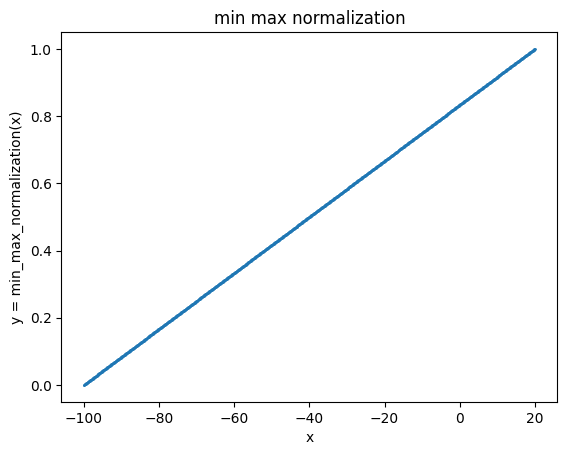

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def min_max_normalization(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

x = np.linspace(-100, 20, 1000)  # 生成-100到20之间的1000个点，步长均匀
y = min_max_normalization(x)

plt.scatter(x, y, s=1)

plt.title('min max normalization')
plt.xlabel('x')
plt.ylabel('y = min_max_normalization(x)')
plt.show()

## 向量的归一化（Normalization）

通常指的是将一个向量（或矩阵的列或行）转化为单位向量，即其长度为1的向量

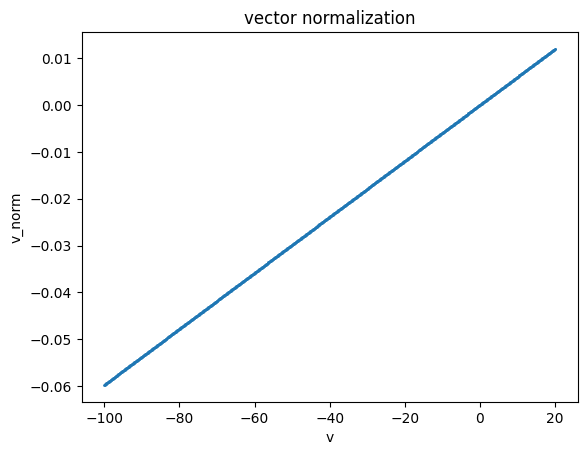

In [12]:
import numpy as np

# v = np.array([1, 2, 3])
v = np.linspace(-100, 20, 1000)
norm_v = np.linalg.norm(v)

v_norm = v / norm_v

# print(f"原始向量:{v}, 范数:{norm_v}")
# print(f"归一化后的向量:{v_norm}, 范数: {np.linalg.norm(v_norm)}")

plt.scatter(v, v_norm, s=1)

plt.title('vector normalization')
plt.xlabel('v')
plt.ylabel('v_norm')
plt.show()

## sigmoid正则化

非线性映射

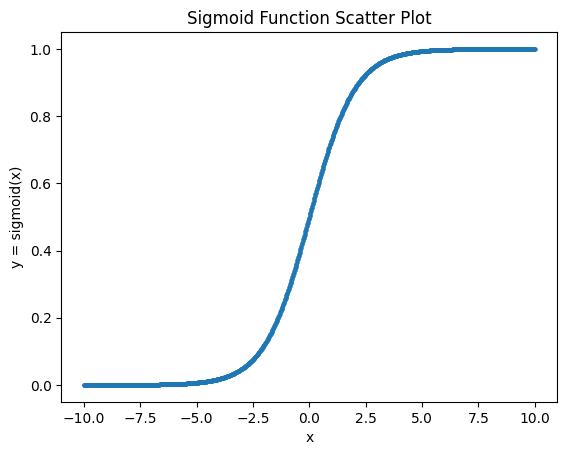

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 定义sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 生成x值的数组
x = np.linspace(-10, 10, 1000)  # 生成-10到10之间的1000个点，步长均匀

# 计算对应的y值（sigmoid函数值）
y = sigmoid(x)

# 使用scatter函数绘制散点图（但这里更推荐使用plot函数）
plt.scatter(x, y, s=5)  # s参数控制点的大小

# 设置图例和坐标轴标签
plt.title('Sigmoid Function Scatter Plot')
plt.xlabel('x')
plt.ylabel('y = sigmoid(x)')

# 显示图形
plt.show()

## 标准化（Z值归一化）

Z-score normalization (standardization)

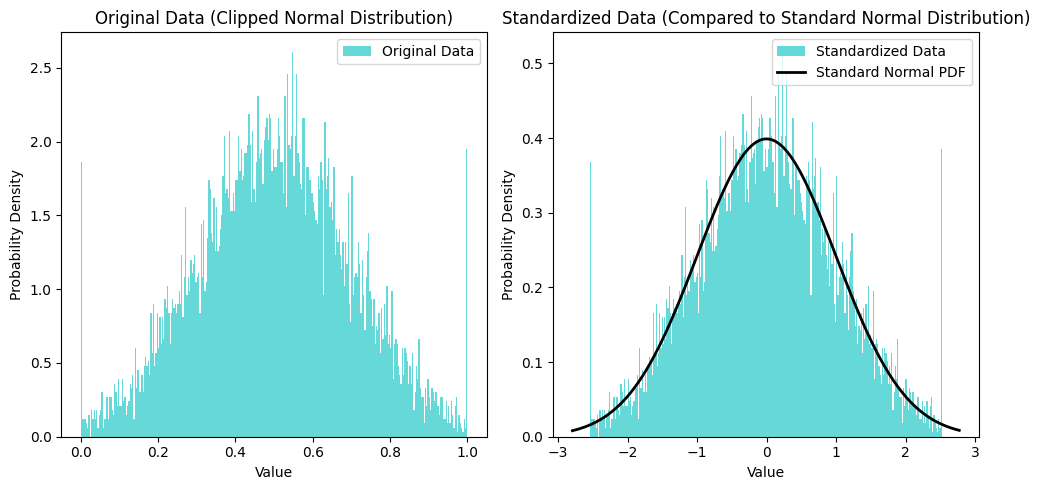

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

original_data = np.random.normal(loc=0.5, scale=0.2, size=10000)  # 均值0.5，标准差0.2
original_data = np.clip(original_data, 0, 1)  # 截断到0到1之间

standardized_data = (original_data - np.mean(original_data)) / np.std(original_data, ddof=1)

# 绘制原始数据的直方图
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(original_data, bins=300, density=True, alpha=0.6, color='c', label='Original Data')
plt.title('Original Data (Clipped Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')

# 绘制标准化数据的直方图，并与标准正态分布曲线进行比较
plt.subplot(1, 2, 2)
plt.hist(standardized_data, bins=300, density=True, alpha=0.6, color='c', label='Standardized Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
# Probability Density Function
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2, label='Standard Normal PDF')
plt.title('Standardized Data (Compared to Standard Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 矩阵分解

## LU分解

### LU分解基础

In [ ]:
import numpy as np
from scipy.linalg import lu

A = np.array([
    [ 2, 4, 3, 5],
    [-4,-7,-5,-8],
    [ 6, 8, 2, 9],
    [ 4, 9,-2,14],
])

L = np.array([
    [ 1, 0, 0, 0],
    [-2, 1, 0, 0],
    [ 3,-4, 1, 0],
    [ 2, 1, 3, 1],
])

U = np.array([
    [ 2, 4, 3, 5],
    [ 0, 1, 1, 2],
    [ 0, 0,-3, 2],
    [ 0, 0, 0,-4],
])

print(L.dot(U))

In [ ]:
import numpy as np

A = np.array([
    [0, 2, 3],
    [1, 0, 4],
    [5, 6, 0]
])

B = np.array([
    [0,1,0],
    [1,0,0],
    [0,0,1],
])
B.dot(A)

In [21]:
import numpy as np
from scipy.linalg import lu

A = np.arange(1, 17).reshape(4,4)
print('A\n', A, '\n')

P, L, U = lu(A)
print('P\n', P)
print('L\n', L)
print('U\n', U, '\n')
print('P\n', P)

B = P.dot(L).dot(U)
print('reconstructed: \n', B)

A
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]] 

P
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
L
 [[ 1.          0.          0.          0.        ]
 [ 0.07692308  1.          0.          0.        ]
 [ 0.69230769  0.33333333  1.          0.        ]
 [ 0.38461538  0.66666667 -0.5         1.        ]]
U
 [[ 1.30000000e+01  1.40000000e+01  1.50000000e+01  1.60000000e+01]
 [ 0.00000000e+00  9.23076923e-01  1.84615385e+00  2.76923077e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15 -1.77635684e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]] 

P
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
reconstructed: 
 [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]


### 用LU分解分析估计回归系数

In [ ]:
import numpy as np

# Number of cases
n = 50

# Create 50 x-values evenly spread between 1 and 500
x = np.linspace(1, 500, n)

# Create X matrix
X = np.column_stack((np.ones(n), x, x**2, x**3))
print('X\n', X)

# Create b matrix (in Python, we can use a 1D array for this)
b = np.array([1, 1, 1, 1])

# Set random seed for reproducibility
np.random.seed(1)

# Create vector of y-values
y = X.dot(b) + np.random.normal(0, 1, n)

# Find determinant of (X^T)X
det_val = np.linalg.det(X.T.dot(X))

print("Determinant of (X^T)X:", det_val)


# 计算X'X
XtX = X.T.dot(X)

# 这里可能不稳定，计算精度上的奇异
print(np.linalg.inv(XtX))

print('逆矩阵解出\n', np.linalg.inv(XtX).dot(X.T).dot(y))


# 计算X'y
Xty = X.T.dot(y)
# print(Xty)

# 使用linalg.solve求解线性方程组X'X * b = X'y
b = np.linalg.solve(XtX, Xty)
print('solve解出\n', b)

使用 LU 分解估计回归系数

In [23]:
import numpy as np

# Number of cases
n = 50

# 形状为50的vector，内容为1-500均匀分布的数字
x = np.linspace(1, 500, n)
print('x\n', x)

# Create X matrix
X = np.column_stack((np.ones(n), x, x**2, x**3))
print('X\n', X)

# 假设b为[1,1,1,1]
b = np.array([1, 1, 1, 1])

# 为了可重复验证
np.random.seed(1)
# 根据假设的b和引入的随机误差，计算出y
y = X.dot(b) + np.random.normal(0, 1, n)
print('y\n', y)

# X^T∙X的行列式
det_val = np.linalg.det(X.T.dot(X))

print("X^T∙X的行列式", det_val)


# 计算X^T∙X
XtX = X.T.dot(X)

# 这里可能不稳定，计算精度上的奇异
print(np.linalg.inv(XtX))
print('逆矩阵解出\n', np.linalg.inv(XtX).dot(X.T).dot(y))


# 计算X^T∙y
Xty = X.T.dot(y)
print('X^T∙y\n', Xty)

# 使用linalg.solve求解线性方程组X'X * b = X'y
b = np.linalg.solve(XtX, Xty)
print('solve解出\n', b)

x
 [  1.          11.18367347  21.36734694  31.55102041  41.73469388
  51.91836735  62.10204082  72.28571429  82.46938776  92.65306122
 102.83673469 113.02040816 123.20408163 133.3877551  143.57142857
 153.75510204 163.93877551 174.12244898 184.30612245 194.48979592
 204.67346939 214.85714286 225.04081633 235.2244898  245.40816327
 255.59183673 265.7755102  275.95918367 286.14285714 296.32653061
 306.51020408 316.69387755 326.87755102 337.06122449 347.24489796
 357.42857143 367.6122449  377.79591837 387.97959184 398.16326531
 408.34693878 418.53061224 428.71428571 438.89795918 449.08163265
 459.26530612 469.44897959 479.63265306 489.81632653 500.        ]
X
 [[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.11836735e+01 1.25074552e+02 1.39879295e+03]
 [1.00000000e+00 2.13673469e+01 4.56563515e+02 9.75555103e+03]
 [1.00000000e+00 3.15510204e+01 9.95466889e+02 3.14079961e+04]
 [1.00000000e+00 4.17346939e+01 1.74178467e+03 7.26928501e+04]
 [1.00000000e+00 5

## QR分解

### QR分解基础

In [ ]:
from numpy import array
from numpy.linalg import qr
# define rectangular matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)

Q, R = qr(A, 'complete')
print(Q)
print(R)

B = Q.dot(R)
print(B)

### QR分解解决最小二乘问题

In [1]:
import numpy as np

A = np.array([
    [1, 1],
    [1, 2],
    [2, 1]])
b = np.array([1, 2, 3])

Q, R = np.linalg.qr(A)

c = Q.T.dot(b)

x = np.linalg.solve(R, c)
print("解x为：", x)

r = b - A.dot(x)
print('残差', r)
print('残差平方和', np.sum(r**2))


# 使用numpy.linalg.lstsq函数求解最小二乘解
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
print("lstsq 解x为:", x)
print("lstsq 解秩为:", rank)
print("lstsq残差平方和:", residuals)

解x为： [1.27272727 0.27272727]
残差 [-0.54545455  0.18181818  0.18181818]
残差平方和 0.3636363636363638
lstsq 解x为: [1.27272727 0.27272727]
lstsq 解秩为: 2
lstsq残差平方和: [0.36363636]


## Cholesky 分解

In [17]:
from numpy import array
from numpy.linalg import cholesky

A = array([
    [2, 1, 1],
    [1, 2, 1],
    [1, 1, 2]])
print(A)

L = cholesky(A)
print(L, L.T)

B = L.dot(L.T)
print(B)


[[2 1 1]
 [1 2 1]
 [1 1 2]]
[[1.41421356 0.         0.        ]
 [0.70710678 1.22474487 0.        ]
 [0.70710678 0.40824829 1.15470054]] [[1.41421356 0.70710678 0.70710678]
 [0.         1.22474487 0.40824829]
 [0.         0.         1.15470054]]
[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]
